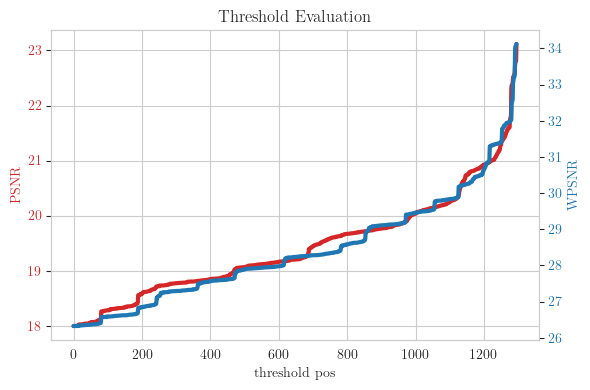

In [65]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
# set latex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')



metrics = sio.loadmat('metrics.mat')['metric_means']

metrics_name = ['corr', 'mse', 'psnr', 'tv', 'wpsnr']
up_metrics = ['psnr', 'tv', 'wpsnr']


metrics_selected = ['psnr', 'wpsnr', 'tv']
metrics_vals = []

for metric_selected in metrics_selected:

    metric_val = metrics[metrics_name.index(metric_selected), :]

    # sort the metric_val and get the index
    metric_val_sorted = np.sort(metric_val)
    metric_val_index = np.argsort(metric_val)

    if metric_selected not in up_metrics:
        metric_val_sorted = metric_val_sorted[::-1]
        metric_val_index = metric_val_index[::-1]
    
    metrics_vals.append(metric_val_sorted)


# plot the figure with twin y axis
fig, ax1 = plt.subplots(figsize=(6, 4))

color = 'tab:red'
ax1.set_xlabel('threshold pos')
ax1.set_ylabel(metrics_selected[0].upper(), color=color)
ax1.plot(metrics_vals[0], color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(metrics_vals[1], color='tab:blue', linewidth=3)
ax2.set_ylabel(metrics_selected[1].upper(), color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.grid(False)
ax2.set_title("Threshold Evaluation")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('metrics.pdf', dpi=300, bbox_inches='tight')




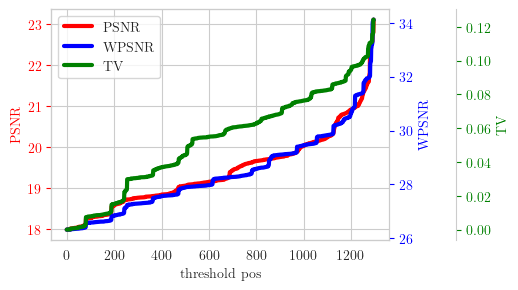

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3) )
fig.subplots_adjust(right=0.8)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(metrics_vals[0], "red", label=metrics_selected[0].upper() , linewidth=3)
p2, = twin1.plot(metrics_vals[1], "blue", label=metrics_selected[1].upper() , linewidth=3)
p3, = twin2.plot(metrics_vals[2], "green", label=metrics_selected[2].upper() , linewidth=3)

# ax.set(xlim=(0, 2), ylim=(0, 2), xlabel="Distance", ylabel="Density")
ax.set(xlabel="threshold pos", ylabel=metrics_selected[0].upper() )
twin1.set(ylabel=metrics_selected[1].upper() )
twin2.set(ylabel=metrics_selected[2].upper())

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

twin1.grid(False)
twin2.grid(False)

ax.tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())
twin2.tick_params(axis='y', colors=p3.get_color())

ax.legend(handles=[p1, p2, p3])

plt.savefig('metrics.pdf', dpi=300, bbox_inches='tight')